## 马尔科夫链蒙特卡洛方法：MCMC

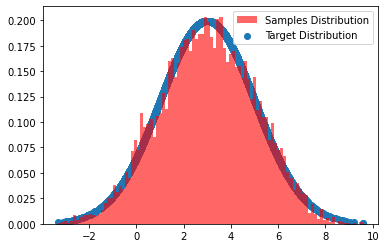

In [1]:
### M-H采样
# 导入相关库 
import random
from scipy.stats import norm
import matplotlib.pyplot as plt

# 定义平稳分布为正态分布
def smooth_dist(theta):
    '''
    输入：
    thetas：数组
    输出：
    y：正态分布概率密度函数
    '''
    y = norm.pdf(theta, loc=3, scale=2)
    return y

# 定义M-H采样函数
def MH_sample(T, sigma):
    '''
    输入：
    T：采样序列长度
    sigma：生成随机序列的尺度参数
    输出：
    pi：经M-H采样后的序列
    '''
    # 初始分布
    pi = [0 for i in range(T)]
    t = 0
    while t < T-1:
        t = t + 1
        # 状态转移进行随机抽样
        pi_star = norm.rvs(loc=pi[t-1], scale=sigma, size=1, random_state=None)  
        alpha = min(1, (smooth_dist(pi_star[0]) / smooth_dist(pi[t-1])))   
        # 从均匀分布中随机抽取一个数u
        u = random.uniform(0, 1)
        # 拒绝-接受采样
        if u < alpha:
            pi[t] = pi_star[0]
        else:
            pi[t] = pi[t-1]
    return pi
    
# 执行MH采样
pi = MH_sample(10000, 1)

### 绘制采样分布
# 绘制目标分布散点图
plt.scatter(pi, norm.pdf(pi, loc=3, scale=2), label='Target Distribution')
# 绘制采样分布直方图
plt.hist(pi, 
         100, 
         density =1, 
         facecolor='red', 
         alpha=0.6, 
         label='Samples Distribution')
plt.legend()
plt.show();

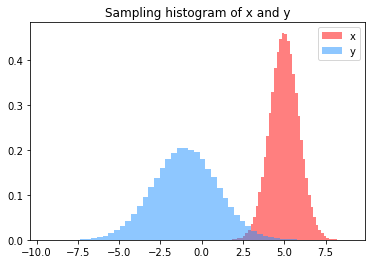

In [2]:
### Gibbs采样
# 导入math库
import math
# 导入多元正态分布函数
from scipy.stats import multivariate_normal

# 指定二元正态分布均值和协方差矩阵
target_distribution = multivariate_normal(mean=[5,-1], cov=[[1,0.5],[0.5,2]])

# 定义给定x的条件下y的条件状态转移分布
def p_yx(x, mu1, mu2, sigma1, sigma2, rho):
    '''
    输入：
    x：公式(25.30)中的x2
    mu1：二维正态分布中的均值1
    mu2：二维正态分布中的均值2
    sigma1：二维正态分布中的标准差1
    sigma2：二维正态分布中的标准差2
    rho：公式(25.30)中的rho
    输出：
    给定x的条件下y的条件状态转移分布
    '''
    return (random.normalvariate(mu2 + rho * sigma2 / sigma1 * (x - mu1), math.sqrt(1 - rho ** 2) * sigma2))

# 定义给定y的条件下x的条件状态转移分布
def p_xy(y, mu1, mu2, sigma1, sigma2, rho):
    '''
    输入：
    y：公式(25.31)中的x1
    mu1：二维正态分布中的均值1
    mu2：二维正态分布中的均值2
    sigma1：二维正态分布中的标准差1
    sigma2：二维正态分布中的标准差2
    rho：公式(25.31)中的rho
    输出：
    给定y的条件下x的条件状态转移分布
    '''
    return (random.normalvariate(mu1 + rho * sigma1 / sigma2 * (y - mu2), math.sqrt(1 - rho ** 2) * sigma1))

def Gibbs_sample(N, K):
    '''
    输入：
    N：采样序列长度
    K：状态转移次数
    输出：
    x_res：Gibbs采样x
    y_res：Gibbs采样y
    z_res：Gibbs采样z
    '''
    x_res = []
    y_res = []
    z_res = []
    # 遍历迭代
    for i in range(N):
        for j in range(K):
            # y给定得到x的采样
            x = p_xy(-1, 5, -1, 1, 2, 0.5)  
            # x给定得到y的采样
            y = p_yx(x, 5, -1, 1, 2, 0.5)   
            z = target_distribution.pdf([x,y])
            x_res.append(x)
            y_res.append(y)
            z_res.append(z)
    return x_res, y_res, z_res

# 二维正态的Gibbs抽样           
x_res, y_res, z_res = Gibbs_sample(10000, 50)

# 绘图
num_bins = 50
plt.hist(x_res, num_bins, density =1, facecolor='red', alpha=0.5, label='x')
plt.hist(y_res, num_bins, density =1, facecolor='dodgerblue', alpha=0.5, label='y')
plt.title('Sampling histogram of x and y')
plt.legend()
plt.show();

C:\Users\18765\AppData\Local\Temp/ipykernel_7060/3522823341.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)


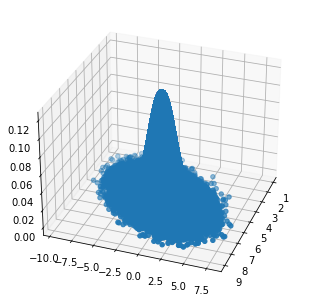

In [3]:
# 绘制抽样样本的二维正态分布
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(x_res, y_res, z_res,marker='o')
plt.show()